In [1]:
import pprint
from time import perf_counter
from numpy import arange, log2
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree


from src.prims_algorithm import prim_algorith_on_labels, \
                                prim_algorith_on_binary_heap, \
                                prim_algorith_on_fibonacci_heap

from src.utils import get_graph, get_random_simple_gnp_graph, \
                    get_number_edges, adjacency_list_to_matrix, test_solution

In [2]:
def draw_solution(Solution, original_graph, figsize=(7,7)):

    G = nx.Graph()

    for vert in original_graph.keys():
        G.add_node(vert)
        for neighbour in original_graph[vert]:
            G.add_node(neighbour[0])
            G.add_edge(vert, neighbour[0], weight = neighbour[1])

    # Create a dictionary specifying the color of each edge
    edge_colors = ['red' if (e in Solution or e[::-1] in Solution) else 'white' for e in G.edges()]
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}


    # Display a graph with specified edge colors
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G) 
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='blue', font_weight='bold', font_size=12, edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_color='black')

    plt.title('MST')
    plt.show()

In [3]:
time_for_algorithm = {
    'labels' : [],
    'binary_heap' : [],
    'fibonacci_heap' : []
}

complexity_for_algorithm = {
    'labels' : [],
    'binary_heap' : [],
    'fibonacci_heap' : []
}

verification = {
    'labels' : {
        'true' : 0,
        'false' : 0
    },
    'binary_heap' : {
        'true' : 0,
        'false' : 0
    },
    'fibonacci_heap' : {
        'true' : 0,
        'false' : 0
    }
}

In [4]:
for number_of_vertex in arange(5, 1000):
    graph = get_graph(number_of_vertex=number_of_vertex)
    graph = dict(sorted(graph.items()))
    
    adj_matrix = adjacency_list_to_matrix(graph)
    true_solution = minimum_spanning_tree(adj_matrix)
    
    start = perf_counter()
    labels_solution = prim_algorith_on_labels(graph)
    time_for_algorithm['labels'].append(perf_counter() - start)
    complexity_for_algorithm['labels'].append(get_number_edges(graph=graph) * log2(number_of_vertex))
    
    if test_solution(true_solution=true_solution, given_solution=labels_solution):
        verification['labels']['true'] += 1
    else:
        verification['labels']['false'] += 1
# pprint.pprint(verification['labels'])

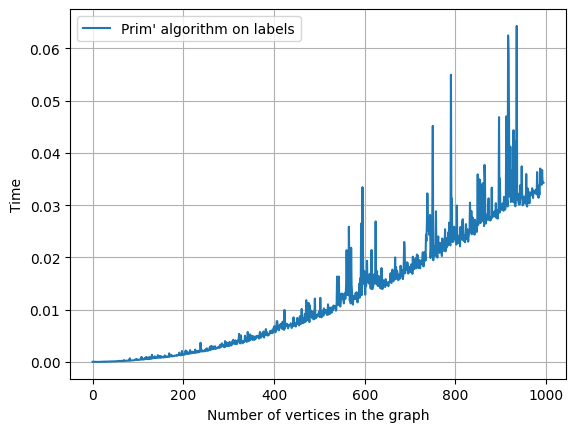

In [5]:
plt.plot(time_for_algorithm['labels'], label = 'Prim\' algorithm on labels')
plt.legend()
plt.xlabel('Number of vertices in the graph')
plt.ylabel('Time')
plt.grid()
plt.show()

In [6]:
for number_of_vertex in arange(5, 1000):
    graph = get_graph(number_of_vertex)

    adj_matrix = adjacency_list_to_matrix(graph)
    true_solution = minimum_spanning_tree(adj_matrix)
    
    start = perf_counter()
    binary_heap_solution = prim_algorith_on_binary_heap(graph)
    time_for_algorithm['binary_heap'].append(perf_counter() - start)
    complexity_for_algorithm['binary_heap'].append(get_number_edges(graph) * log2(number_of_vertex))

    if test_solution(true_solution=true_solution, given_solution=binary_heap_solution):
        verification['binary_heap']['true'] += 1
    else:
        verification['binary_heap']['false'] += 1
# pprint.pprint(verification['binary_heap'])

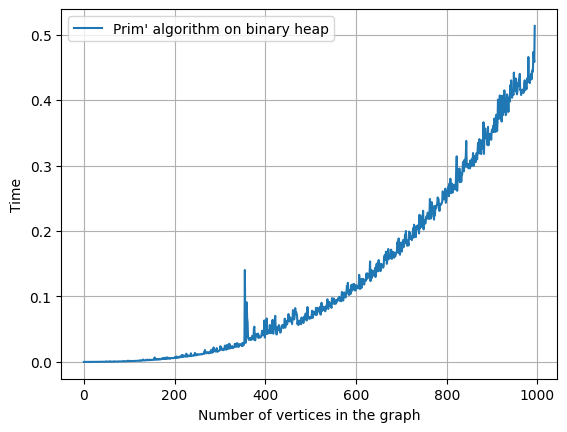

In [7]:
plt.plot(time_for_algorithm['binary_heap'], label = 'Prim\' algorithm on binary heap')
plt.legend()
plt.xlabel('Number of vertices in the graph')
plt.ylabel('Time')
plt.grid()
plt.show()

In [8]:
for number_of_vertex in arange(5, 1000):
    graph = get_graph(number_of_vertex)
    graph = dict(sorted(graph.items()))
    
    adj_matrix = adjacency_list_to_matrix(graph)
    true_solution = minimum_spanning_tree(adj_matrix)
    
    start = perf_counter() 
    fibonacci_heap_solution = prim_algorith_on_fibonacci_heap(graph)
    time_for_algorithm['fibonacci_heap'].append(perf_counter() - start)
    complexity_for_algorithm['fibonacci_heap'].append(number_of_vertex * log2(number_of_vertex) + get_number_edges(graph))

    if test_solution(true_solution=true_solution, given_solution=labels_solution):
        verification['fibonacci_heap']['true'] += 1
    else:
        verification['fibonacci_heap']['false'] += 1
# pprint.pprint(verification['fibonacci_heap'])

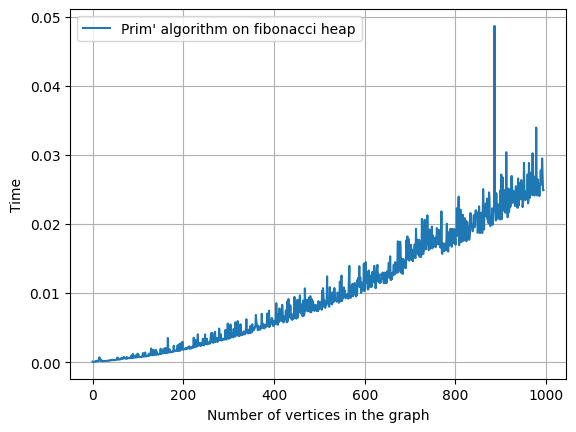

In [9]:
plt.plot(time_for_algorithm['fibonacci_heap'], label = 'Prim\' algorithm on fibonacci heap')
plt.legend()
plt.xlabel('Number of vertices in the graph')
plt.ylabel('Time')
plt.grid()
plt.show()

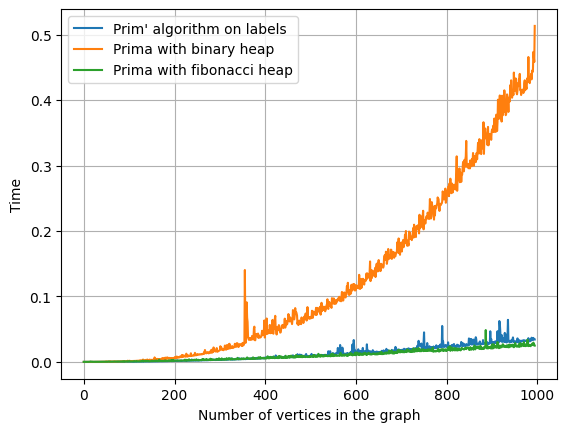

In [10]:
plt.plot(time_for_algorithm['labels'], label = 'Prim\' algorithm on labels')
plt.plot(time_for_algorithm['binary_heap'], label = 'Prima with binary heap')
plt.plot(time_for_algorithm['fibonacci_heap'], label = 'Prima with fibonacci heap')
plt.legend()
plt.xlabel('Number of vertices in the graph')
plt.ylabel('Time')
plt.grid()
plt.show()

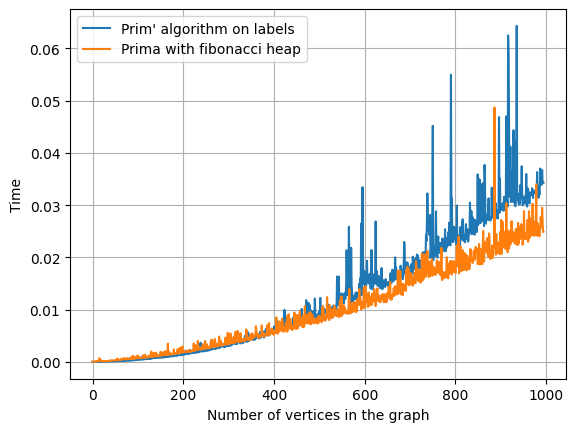

In [11]:
plt.plot(time_for_algorithm['labels'], label = 'Prim\' algorithm on labels')
plt.plot(time_for_algorithm['fibonacci_heap'], label = 'Prima with fibonacci heap')
plt.legend()
plt.xlabel('Number of vertices in the graph')
plt.ylabel('Time')
plt.grid()
plt.show()